# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def scale_data(df):
    ''' Scale input dataframe with StandartScaler '''
    print(df.shape)
    scaler = StandardScaler()
    return scaler.fit_transform(df)

In [3]:
def find_best_cluster_count(X_scaled):
    k_inertia = []
    ks = range(1,11)

    for k in ks:
        clf_kmeans = KMeans(n_clusters=k)
        clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
        k_inertia.append(clf_kmeans.inertia_)
    
    diff = np.diff(k_inertia)
    diff_r = diff[1:] / diff[:-1]

    fig, ax = plt.subplots()
    ax.plot(ks[1:-1], diff_r);
    ax.set_title('Показатель Inertia для KMeans')
    
    k_opt = ks[np.argmin(diff_r)+1]
    print(f'Оптимальное количество кластеров: {k_opt}')
    return k_opt

In [4]:
def show_me_clusters(X, p_clusters):
    ''' Plot clusters defined with KMeans '''
    fig, ax = plt.subplots()
    alpha = 0.3
    cluster_algo = KMeans(n_clusters=p_clusters)
    clusters = cluster_algo.fit_predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap='autumn', s=60, alpha=alpha)
    ax.set_title(f'KMeans с количеством кластеров = {p_clusters}')

    centers = cluster_algo.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], s=50);
    return clusters

In [5]:
df_comment = pd.read_excel('../data/geo_comment.xlsx').drop('Unnamed: 0', axis=1)

In [6]:
df_comment.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [7]:
# не нужен он нам, пока лекций по анализу текста у нас еще не было
del df_comment

In [8]:
df = pd.read_excel('../data/geo.xlsx').drop('Unnamed: 0', axis=1)

In [9]:
df.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


### Визуально разделим город на районы безотносительно голосов

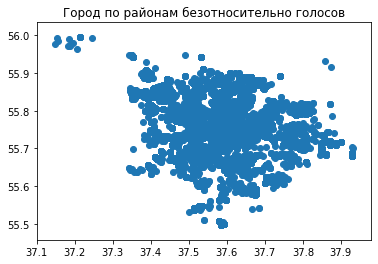

In [10]:
# данные без кластеризации
fig, ax = plt.subplots()
ax.set_title('Город по районам безотносительно голосов')
ax.scatter(df['x'], df['y']);

### Проведем кластеризацию - определим оптимальное количество кластеров

(108806, 2)


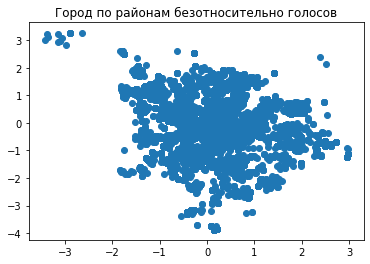

In [11]:
X_scaled = scale_data(df[['x','y']])
# проверим масштабы после standartscaler и что распределение не изменилось
fig, ax = plt.subplots()
ax.set_title('Город по районам безотносительно голосов')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1]);

Оптимальное количество кластеров: 3


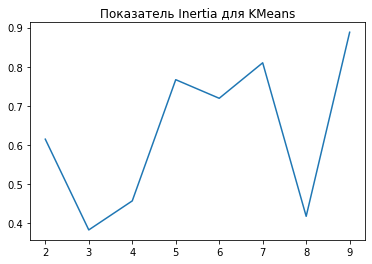

In [12]:
k_opt = find_best_cluster_count(X_scaled)

### Выведем картинку с полученной кластеризацией

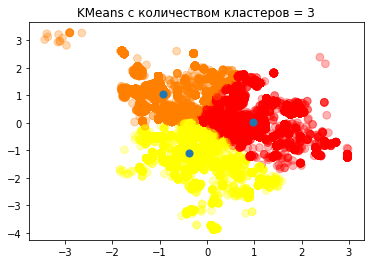

In [13]:
clusters = show_me_clusters(X_scaled, k_opt)

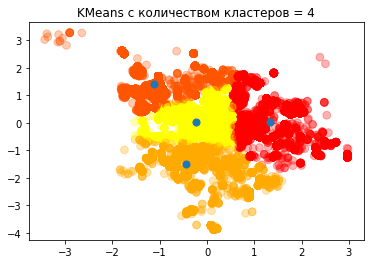

In [14]:
# для сравнения посмотрим на картинку с количеством кластеров = 4
clusters = show_me_clusters(X_scaled, 4)

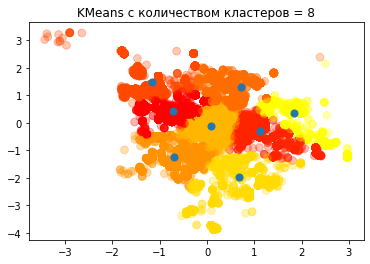

In [15]:
# для сравнения посмотрим на картинку с количеством кластеров = 8
clusters = show_me_clusters(X_scaled, 8)

### Исследуем скопления голосов за и против отдельно

#### 1. Голоса ЗА

(13659, 2)


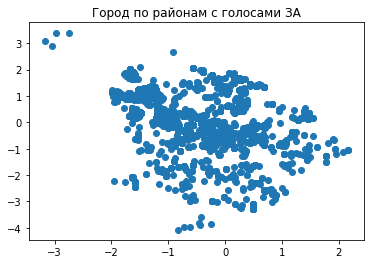

In [16]:
# данные без кластеризации
X_scaled = scale_data(df[df['comment_class']==1][['x','y']])
fig, ax = plt.subplots()
ax.set_title('Город по районам с голосами ЗА')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1]);

Оптимальное количество кластеров: 3


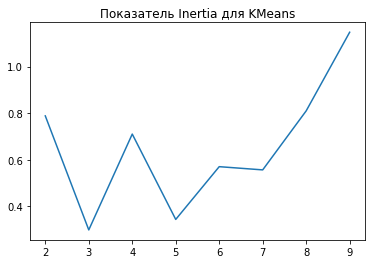

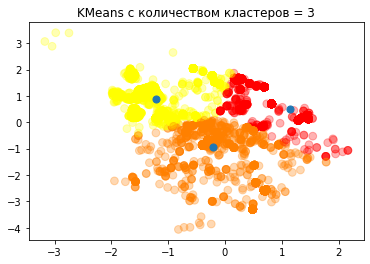

In [17]:
k_opt = find_best_cluster_count(X_scaled)
clusters = show_me_clusters(X_scaled, k_opt)

#### 2. Голоса "ПРОТИВ"

(95147, 2)


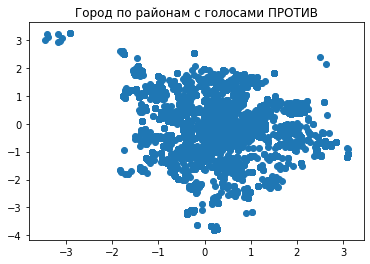

In [18]:
X_scaled = scale_data(df[df['comment_class']==-1][['x','y']])
fig, ax = plt.subplots()
ax.set_title('Город по районам с голосами ПРОТИВ')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1]);

Оптимальное количество кластеров: 3


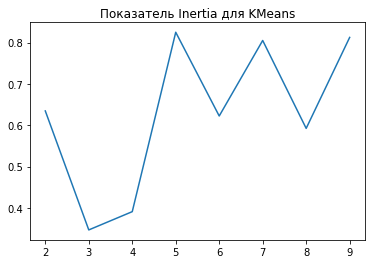

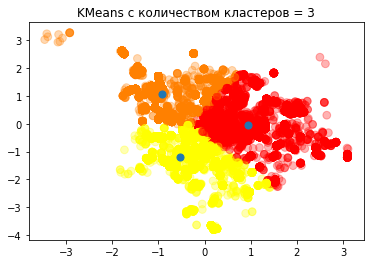

In [19]:
k_opt = find_best_cluster_count(X_scaled)
clusters = show_me_clusters(X_scaled, k_opt)

#### Найдем наиболее активные в голосовании районы (подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')

In [20]:
X = scale_data(df[['x','y']])

(108806, 2)


Text(0.5, 1.0, 'Активность районов в голосовании')

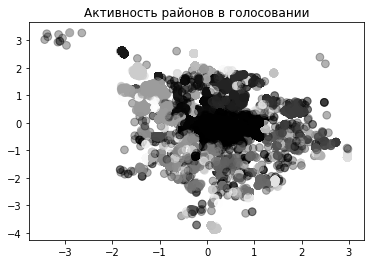

In [21]:
fig, ax = plt.subplots()
alpha = 0.3
cluster_algo = DBSCAN(eps=0.07)
clusters = cluster_algo.fit_predict(X)
ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap='gray', s=60, alpha=alpha)
ax.set_title('Активность районов в голосовании')

#### Вывод: наиболее активные районы в центре и чуть севернее.